<a href="https://colab.research.google.com/github/Mamadou2025/Rickart-Semiring-Analyser-Gcd_Max/blob/main/Gcd_Rickart_Semiring_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from itertools import product

def is_endomorphism(f, M):
    """Checks if f preserves the gcd operation"""
    for x, y in product(M, repeat=2):
        if f[gcd(x, y)] != gcd(f[x], f[y]):
            return False
    return True

def gcd(x, y):
    """Computes the GCD of x and y with gcd(0,0) = 0"""
    while y != 0:
        x, y = y, x % y
    return abs(x) if x != 0 else 0

def is_idempotent(f, M):
    """Checks if f ∘ f = f"""
    for x in M:
        if f[f[x]] != f[x]:
            return False
    return True

def compose(f, f_i, M):
    """Compute composition f ∘ f_i"""
    return tuple(sorted((x, f[f_i[x]]) for x in M))

def subtractive_closure(S, M):
    """Compute subtractive closure Im_S(f)"""
    Im_S_f = set()
    for f_i in S:
        for f_j in S:
            for f_k in S:
                if {x: gcd(f_i[x], f_j[x]) for x in M} == f_k:
                    Im_S_f.add(tuple(sorted(f_k.items())))
    return Im_S_f

def is_i_rickart(S, M):
    """Check if S is i-Rickart"""
    for f in S:
        if is_idempotent(f, M):
            f_composed = {compose(f, f_j, M) for f_j in S}
            if f_composed == {tuple(sorted(f.items()))}:
                return True
    return False

def is_w_rickart(S, M):
    """Check if S is w-Rickart"""
    if is_i_rickart(S, M):
        if {tuple(sorted(f.items())) for f in S} == subtractive_closure(S, M):
            return True
    return False

def test_s_rickart(n):
    M = list(range(n + 1))
    S = []
    for f_tuple in product(range(n + 1), repeat=n + 1):
        f = {i: f_tuple[i] for i in M}
        if is_endomorphism(f, M) and f[0] == 0:
            S.append(f)

    print(f"Testing endomorphism semiring of M = {M}:")

    if is_i_rickart(S, M):
        print("S is i-Rickart.")
        if is_w_rickart(S, M):
            print("S is w-Rickart.")
        else:
            print("S is not w-Rickart.")
    else:
        print("S is not i-Rickart.")

# Test for M = {0, 1, 2, ..., n}
n = 2  # You can change n to generate different sets
test_s_rickart(n)

Testing endomorphism semiring of M = [0, 1, 2]:
S is i-Rickart.
S is w-Rickart.


## Usage

Run the script with:

google colab. Choose n and run. Result for n=2:

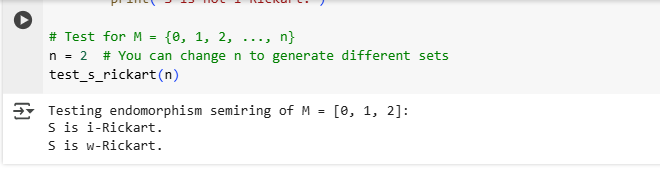

# Endomorphism Semiring and Rickart Properties

This Python script analyzes the structure of the endomorphism semiring over a set \( M \), determining whether the semiring exhibits i-Rickart and w-Rickart properties.

## Overview

The script defines several functions that:
- Check whether a function preserves the greatest common divisor (GCD) operation (`is_endomorphism`).
- Determine if a function is idempotent (`is_idempotent`).
- Compute function composition (`compose`).
- Compute the subtractive closure of a semiring (`subtractive_closure`).
- Check whether the semiring satisfies i-Rickart and w-Rickart properties (`is_i_rickart`, `is_w_rickart`).
- Generate all valid endomorphisms and test the Rickart properties (`test_s_rickart`).


